In [5]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# mount google drive in colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
data= pd.read_csv('/content/drive/MyDrive/mobile_price_classification.csv')

# EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   2000 non-null   int64  
 1   bluetooth       2000 non-null   int64  
 2   clock_speed     2000 non-null   float64
 3   dual_sim        2000 non-null   int64  
 4   front_cam       2000 non-null   int64  
 5   4G              2000 non-null   int64  
 6   int_memory      2000 non-null   int64  
 7   m_dep           2000 non-null   float64
 8   mobile_wt       2000 non-null   int64  
 9   n_cores         2000 non-null   int64  
 10  primary_camera  2000 non-null   int64  
 11  px_height       2000 non-null   int64  
 12  px_width        2000 non-null   int64  
 13  ram             2000 non-null   int64  
 14  sc_h            2000 non-null   int64  
 15  sc_w            2000 non-null   int64  
 16  talk_time       2000 non-null   int64  
 17  three_g         2000 non-null   i

In [27]:
data.describe()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
data.isna().sum()

,0
battery_power,0
bluetooth,0
clock_speed,0
dual_sim,0
front_cam,0
4G,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [ ]:
# all fields are integers, no null values present.

In [ ]:
data.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
data['price_range'].value_counts()

,count
price_range,
1,500
2,500
3,500
0,500


In [ ]:
# in neural networks, if more information available, then the system can study well.

In [10]:
# FEATURE TARGET SPLITTING
x= data.drop(columns=['price_range'])
y= data['price_range']

In [11]:
# splitting dataset into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [28]:
x_train.shape, y_train.shape

((1600, 20), (1600,))

In [12]:
x_train

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,primary_camera,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
968,1923,0,0.5,1,7,0,46,0.5,191,1,10,767,1759,1489,10,9,3,1,1,1
240,633,1,2.2,0,0,1,49,0.1,139,8,1,529,1009,3560,11,1,16,1,1,1
819,1236,0,0.9,1,2,1,57,0.1,188,1,14,517,809,1406,14,12,20,1,0,1
692,781,0,1.1,0,2,0,38,0.4,198,5,7,304,1674,3508,13,8,5,0,0,1
420,1456,1,0.5,1,7,0,7,0.4,105,5,12,823,1104,1587,6,5,20,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1975,1,1.9,1,2,0,31,0.9,151,1,17,775,1607,3022,13,5,19,0,0,1
1294,589,1,0.5,0,1,1,59,0.7,146,8,4,759,1858,362,16,10,6,1,1,1
860,1829,1,0.5,0,0,1,15,0.4,160,5,7,729,1267,2080,16,11,12,1,0,1
1459,1927,0,0.9,1,3,0,11,0.4,190,8,12,491,1506,2916,16,11,18,0,1,1


In [13]:
y_train

,price_range
968,1
240,2
819,0
692,3
420,1
...,...
1130,3
1294,0
860,2
1459,3


# ANN Implementation

In [30]:
!pip install tensorflow keras # installing tensorflow and keras.

In [14]:
from keras.models import Sequential
from keras.layers import Dense

In [31]:
# Input Layer: The no of neurons equal to no of input features in dataset

In [34]:
# Initialize the model: create s sequential model where layers can be added one after the other.
model= Sequential()
# to add hidden layer we use add() function
model.add(Dense(10, input_dim=20, activation='relu')) # expecting 20 features in 10 neurons, 1st layer, input_dim only for 1st layer.
# adding the second hidden layer.
model.add(Dense(10, activation='relu'))# keep less number of neurons
# adding the output layer.
model.add(Dense(4, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile the model

In [37]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model

In [38]:
model.fit(x_train, y_train, epochs=100)
# epochs means the number of iterations the above function has to perform

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1040 - loss: 489.6583
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1695 - loss: 129.9625
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3537 - loss: 23.1038
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3831 - loss: 7.9434
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3852 - loss: 4.8872
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3562 - loss: 3.4816
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3749 - loss: 2.5694
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3542 - loss: 2.1356
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3397 - loss: 1.7564
Epoch 10/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3389 - loss: 1.6223
Epoch 11/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3678 - loss: 1.4531
Epoch 12/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - ac

In [40]:
# predicting the test set rsult
y_pred= model.predict(x_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [41]:
y_pred

array([[9.2043948e-01, 7.9280697e-02, 2.7994407e-04, 2.3265808e-14],
       [9.4366029e-02, 2.9123044e-01, 4.5199004e-01, 1.6241355e-01],
       [6.4330137e-01, 3.3206660e-01, 2.4631891e-02, 1.3559882e-07],
       ...,
       [9.6048638e-02, 2.9464319e-01, 4.5262694e-01, 1.5668119e-01],
       [3.8318582e-02, 1.4776751e-01, 3.3495870e-01, 4.7895512e-01],
       [8.3177932e-02, 2.6729369e-01, 4.4436592e-01, 2.0516242e-01]],
      dtype=float32)

In [42]:
y_pred= np.argmax(y_pred, axis=1)

In [44]:
score, acc= model.evaluate(x_train, y_train)
print('Train score:', score)
print('Train accuracy:', acc)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5982 - loss: 0.8592
Train score: 0.8579197525978088
Train accuracy: 0.6081249713897705


In [43]:
score, acc= model.evaluate(x_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6264 - loss: 0.8436
Test score: 0.8693706393241882
Test accuracy: 0.6100000143051147


In [45]:
from sklearn.metrics import confusion_matrix
confusionMatrix= confusion_matrix(y_test, y_pred)
confusionMatrix

array([[ 87,  17,   1,   0],
       [ 29,  37,  11,  14],
       [  0,  24,  17,  51],
       [  0,   1,   8, 103]])

# Evaluation Metric

Text(0.5, 23.52222222222222, 'Predicted label')

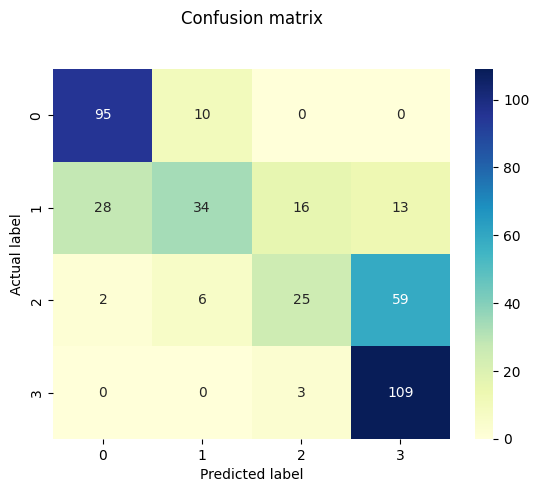

In [25]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
p = sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.10)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [26]:
# import classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.90      0.83       105
           1       0.68      0.37      0.48        91
           2       0.57      0.27      0.37        92
           3       0.60      0.97      0.74       112

    accuracy                           0.66       400
   macro avg       0.65      0.63      0.61       400
weighted avg       0.65      0.66      0.62       400



In [46]:
# summarizing the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │              44 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,094 (4.28 KB)

 Trainable params: 364 (1.42 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 730 (2.86 KB)

Hyperparameter tuning

In [48]:
pip install tensorflow keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.6 MB/s eta 0:00:00


In [58]:
import keras_tuner as kt
import tensorflow as tf

In [71]:
def build_model(hp):
  model= Sequential()
  model.add(Dense(10, input_dim=20, activation='relu'))

  for i in range(hp.Int('num_layers', 2, 10)):
    model.add(Dense(hp.Int('units_' + str(i), min_value=32, max_value=512, step=32), activation='relu'))
    model.add(Dense(4, activation='softmax'))
    model.compile(
        optimizer= tf.keras.optimizers.get({
            'class_name': hp.Choice('optimizer',values=['adam', 'rmsprop', 'sgd']),
            'config': {
                'learning_rate': hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG', default=1e-3)
            }
        }),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [72]:
tuner= kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='project',
    project_name='mobile_price_classification'
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
tuner.search(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Trial 5 Complete [00h 00m 12s]
val_accuracy: 0.2441666672627131

Best val_accuracy So Far: 0.5608333150545756
Total elapsed time: 00h 00m 59s


In [76]:
best_hps= tuner.get_best_hyperparameters()[0]
print('Best Parameters:',best_hps)
print('Optimizer:', best_hps.get('optimizer'))
print('Learning Rate:', best_hps.get('learning_rate'))
print('Number of Layers:', best_hps.get('num_layers'))


Best Parameters: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x7e03a4902110>
Optimizer: adam
Learning Rate: 0.004427941205153953
Number of Layers: 7
